# imorting the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
import os
import scipy.optimize as opt
from sklearn import preprocessing #data visualization

# loading data set

In [2]:
path = 'all_perth_data.csv'
df = pd.read_csv(path)


In [3]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


# data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
df.shape

(33656, 19)

### histograms

array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDROOMS'}>,
        <Axes: title={'center': 'BATHROOMS'}>,
        <Axes: title={'center': 'GARAGE'}>],
       [<Axes: title={'center': 'LAND_AREA'}>,
        <Axes: title={'center': 'FLOOR_AREA'}>,
        <Axes: title={'center': 'BUILD_YEAR'}>,
        <Axes: title={'center': 'CBD_DIST'}>],
       [<Axes: title={'center': 'NEAREST_STN_DIST'}>,
        <Axes: title={'center': 'POSTCODE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>],
       [<Axes: title={'center': 'NEAREST_SCH_DIST'}>,
        <Axes: title={'center': 'NEAREST_SCH_RANK'}>, <Axes: >, <Axes: >]],
      dtype=object)

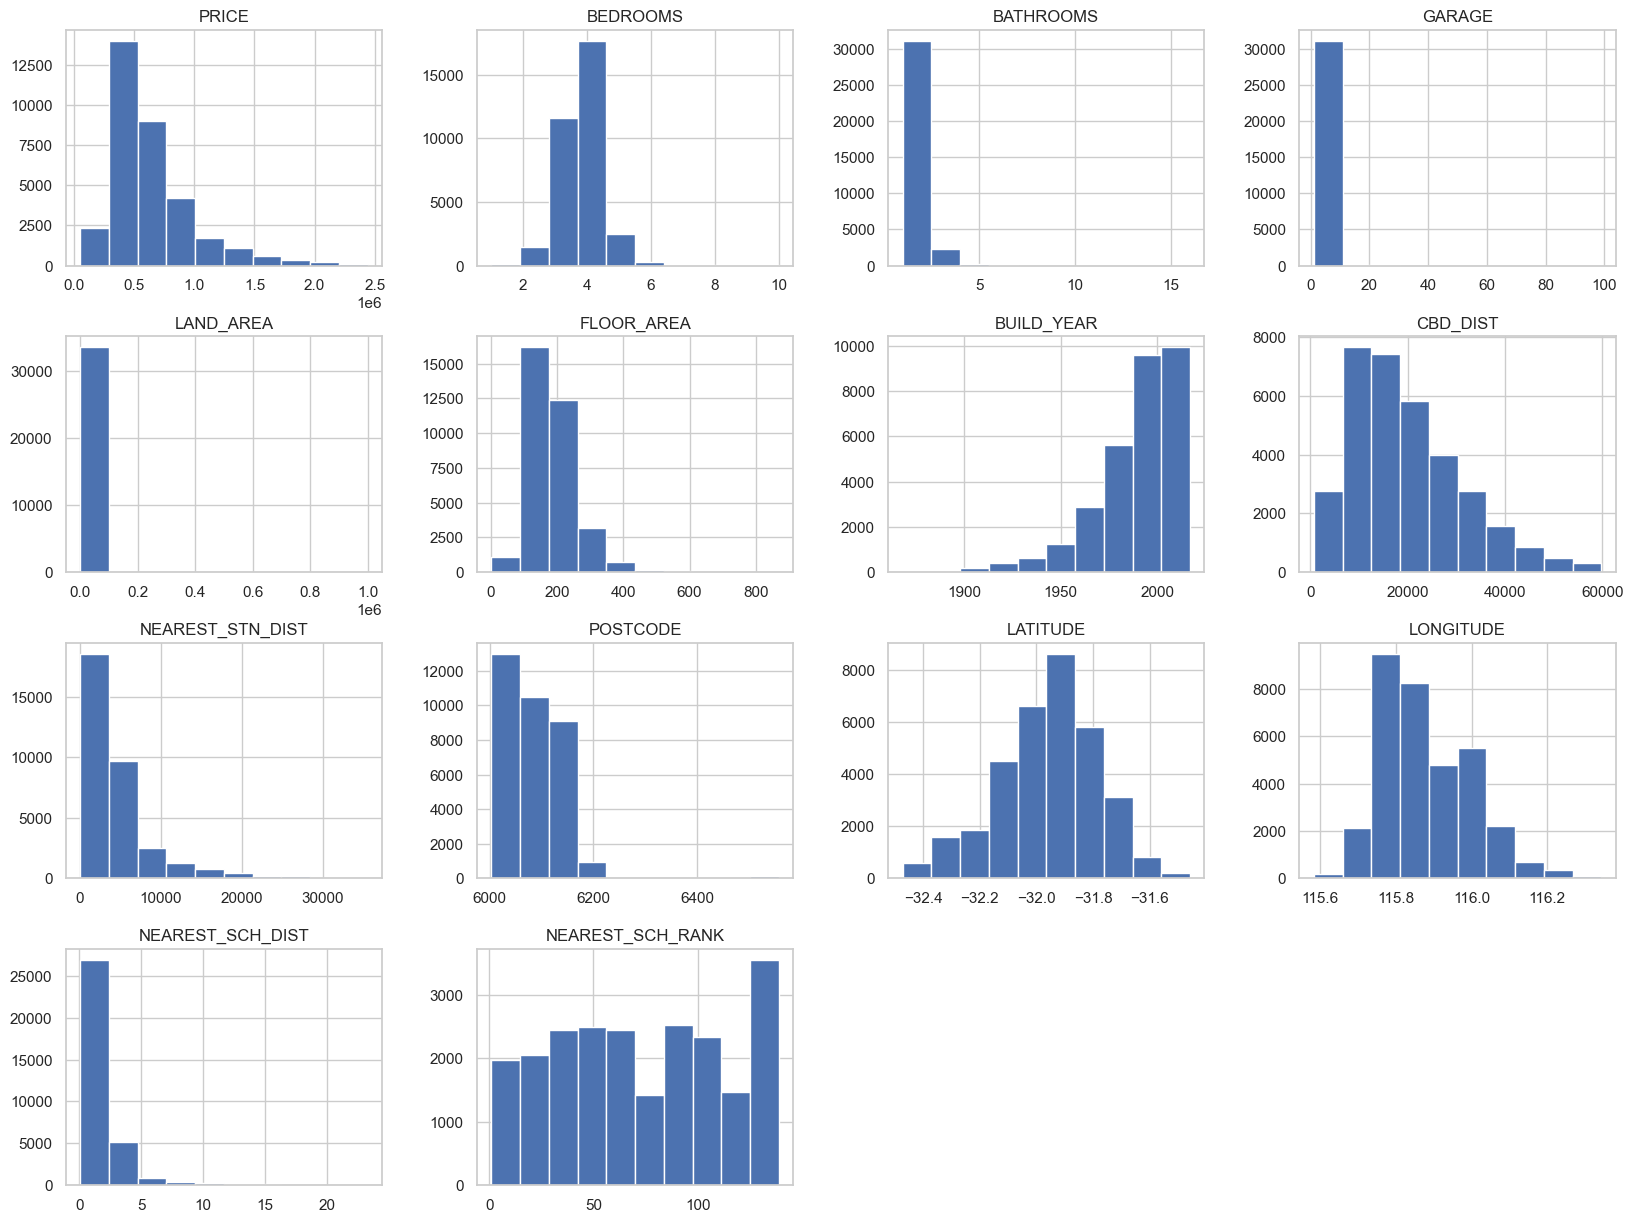

In [6]:
df.hist(figsize=(20,15))

### correlation analysis

In [7]:
df.corr()

/var/folders/g4/tpp7p1vs4817f45fr3pw_9dw0000gn/T/ipykernel_15001/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
PRICE,1.000000,0.252637,0.377133,0.134343,0.056855,0.548497,-0.157218,-0.354327,-0.095089,-0.171553,0.053041,-0.183734,-0.021941,-0.461991
BEDROOMS,0.252637,1.000000,0.555702,0.194197,0.051223,0.536926,0.229019,0.124654,0.102203,0.010601,0.021967,-0.015170,0.092391,0.024461
BATHROOMS,0.377133,0.555702,1.000000,0.186801,0.027059,0.555843,0.339594,0.033053,0.037068,-0.041374,0.051411,-0.093817,0.060734,-0.096024
GARAGE,0.134343,0.194197,0.186801,1.000000,0.059211,0.201541,0.040371,0.046244,0.110527,0.028005,-0.016416,0.091270,0.099654,0.021863
LAND_AREA,0.056855,0.051223,0.027059,0.059211,1.000000,0.073836,0.002063,0.133262,0.233023,0.042070,-0.014389,0.151255,0.286964,0.048758
FLOOR_AREA,0.548497,0.536926,0.555843,0.201541,0.073836,1.000000,0.226872,0.022687,0.106527,-0.050658,0.043555,-0.046625,0.120048,-0.145502
BUILD_YEAR,-0.157218,0.229019,0.339594,0.040371,0.002063,0.226872,1.000000,0.270110,0.103350,0.044095,0.045463,-0.059047,0.108719,0.158639
CBD_DIST,-0.354327,0.124654,0.033053,0.046244,0.133262,0.022687,0.270110,1.000000,0.446496,0.255801,-0.196813,-0.060097,0.377118,0.328703
NEAREST_STN_DIST,-0.095089,0.102203,0.037068,0.110527,0.233023,0.106527,0.103350,0.446496,1.000000,0.204347,0.037174,0.496924,0.634712,0.189571
POSTCODE,-0.171553,0.010601,-0.041374,0.028005,0.042070,-0.050658,0.044095,0.255801,0.204347,1.000000,-0.642643,0.173918,0.128424,0.192768


/var/folders/g4/tpp7p1vs4817f45fr3pw_9dw0000gn/T/ipykernel_15001/2084768826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax =1)


<Axes: >

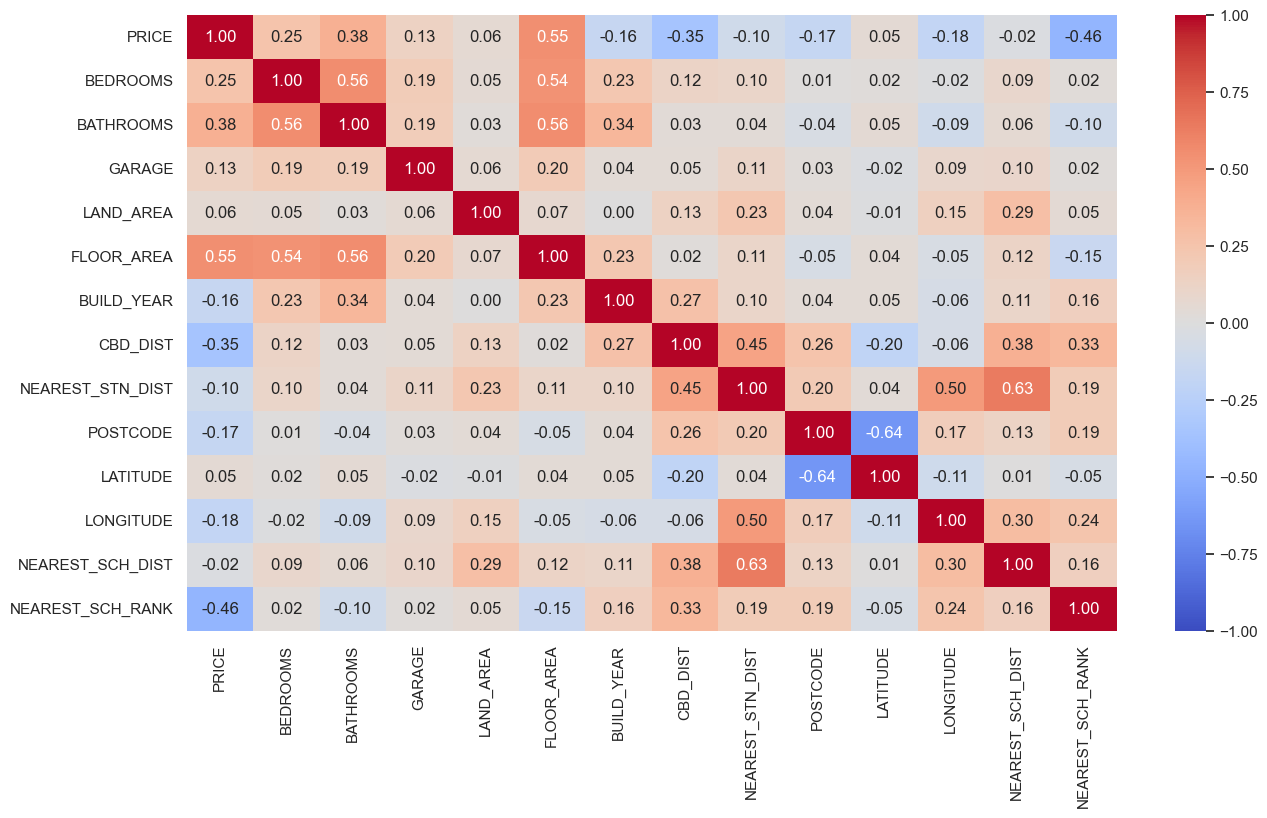

In [8]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax =1)

# Data Preprocessing

In [9]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [10]:
#Dropping the null values
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

# Handling Outliers

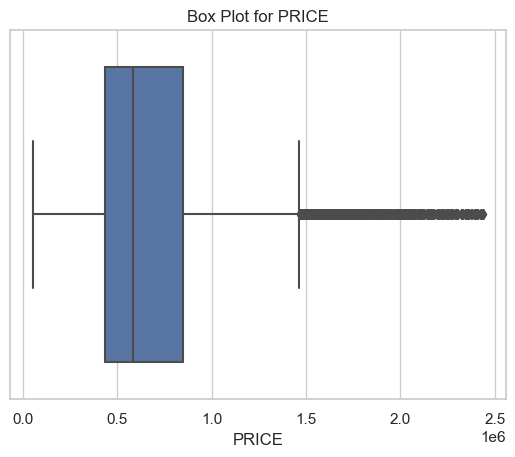

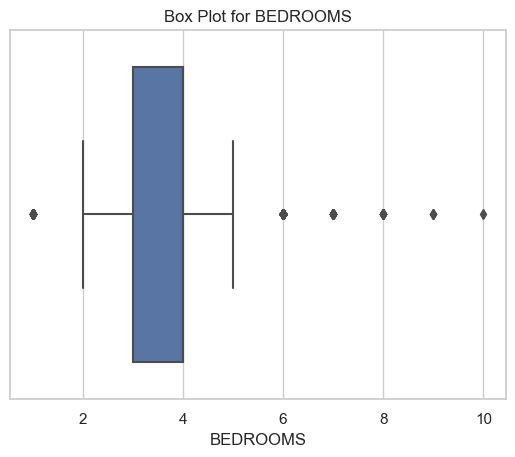

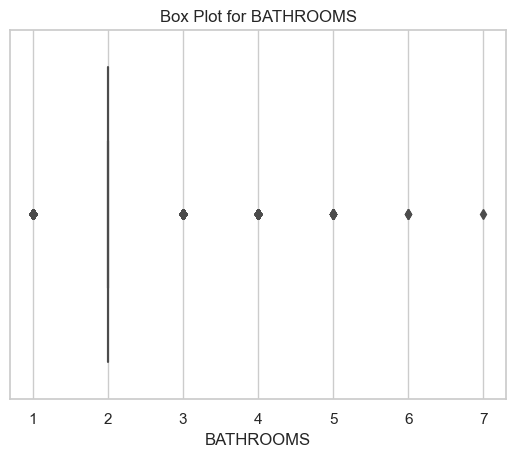

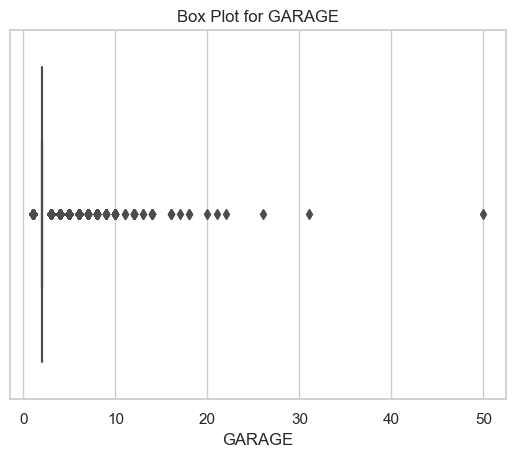

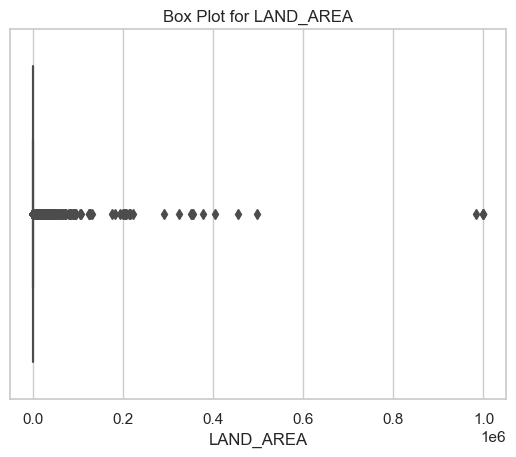

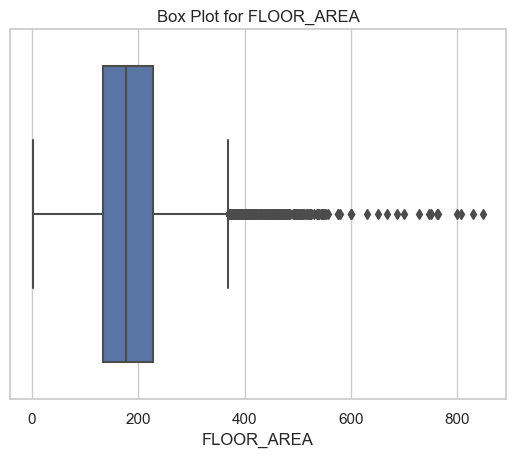

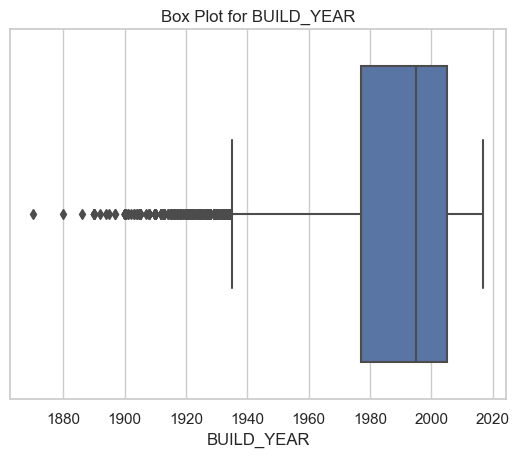

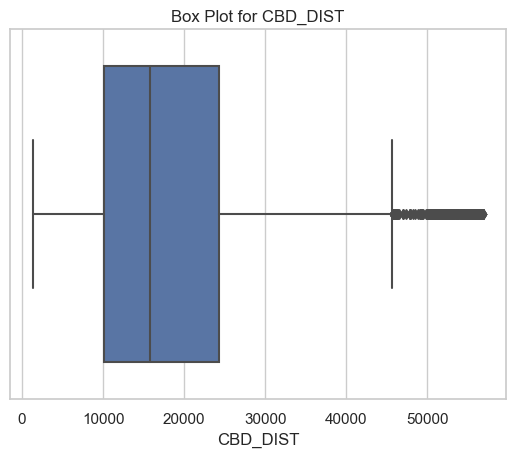

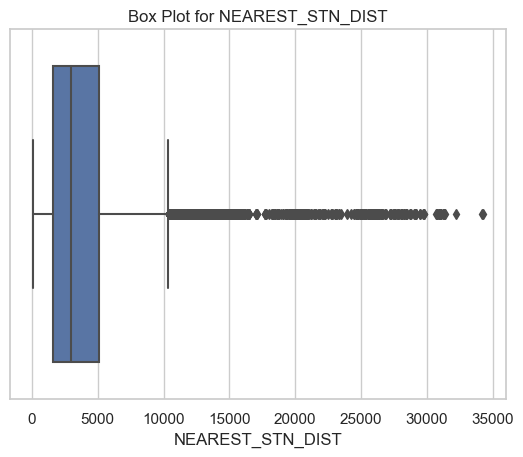

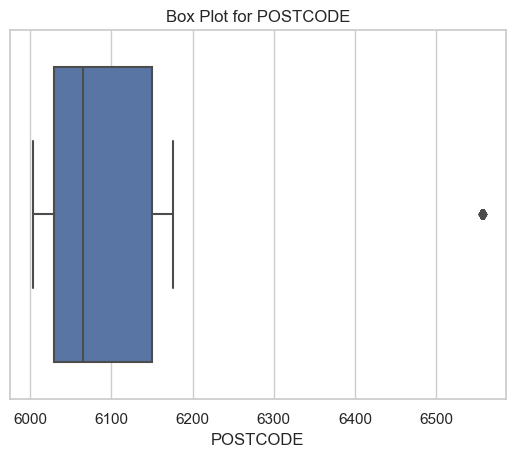

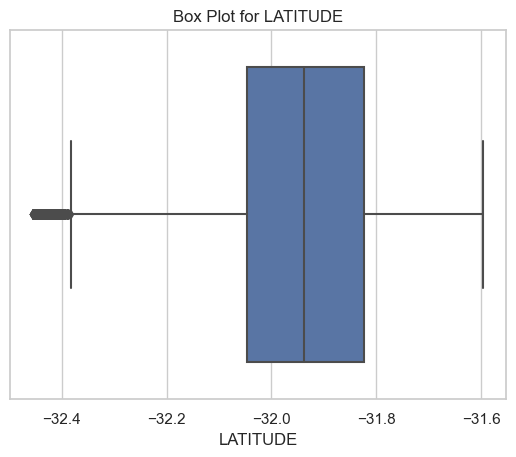

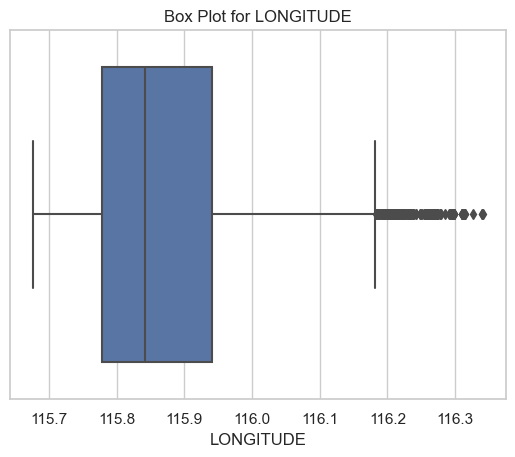

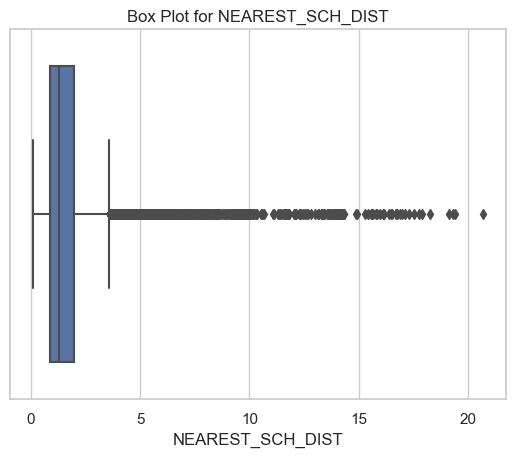

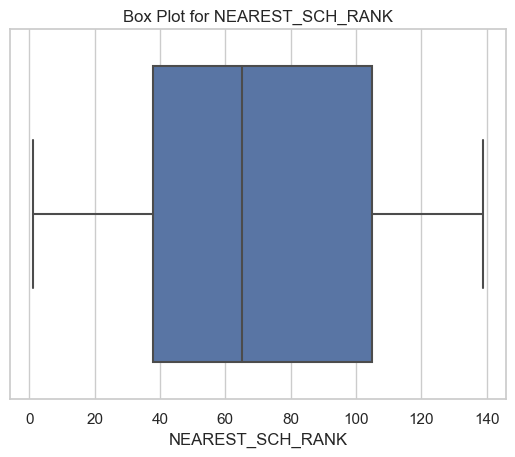

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns 
numerical_columns = df.select_dtypes(include=['int64', 'float64'])


# Create box plots for each numerical column
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()



### Handling the outliers

In [13]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,1.920800e+04,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,6.998658e+05,3.676020,1.861776,2.183205,2441.914879,187.532330,1988.922741,18327.112922,4188.389681,6086.237245,-31.949166,115.864546,1.684322,72.094492
std,3.872944e+05,0.750726,0.587704,1.221165,18446.099139,72.985315,21.907656,10937.511971,4172.353928,64.491313,0.167803,0.109222,1.570357,40.672225
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,1300.000000,46.000000,6003.000000,-32.455550,115.675834,0.070912,1.000000
25%,4.380000e+05,3.000000,2.000000,2.000000,494.000000,134.000000,1977.000000,10100.000000,1600.000000,6030.000000,-32.047148,115.778941,0.866041,38.000000
50%,5.850000e+05,4.000000,2.000000,2.000000,675.000000,177.000000,1995.000000,15800.000000,3000.000000,6065.000000,-31.937099,115.842006,1.301665,65.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,809.000000,228.000000,2005.000000,24300.000000,5100.000000,6150.000000,-31.823297,115.940476,1.957117,105.000000
max,2.440000e+06,10.000000,7.000000,50.000000,999999.000000,849.000000,2017.000000,56900.000000,34300.000000,6558.000000,-31.595910,116.341780,20.720911,139.000000


In [14]:
from scipy import stats
# Calculate Z-scores for each numerical column
z_scores = np.abs(stats.zscore(numerical_columns))

# Create an empty DataFrame to store Z-scores
z_scores_df = pd.DataFrame(data=z_scores, columns=numerical_columns.columns)

In [15]:
z_scores_df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,0.746710,0.813036,0.701586,0.522036,0.177779,0.770056,0.772130,0.792745,0.669392,0.801511,0.795536,0.807984,0.584846,0.879327
std,0.665167,0.582228,0.712604,0.852945,0.984096,0.637993,0.635481,0.609570,0.742928,0.597995,0.605923,0.589220,0.811165,0.476231
min,0.000344,0.431566,0.235199,0.150029,0.000005,0.006408,0.003527,0.002479,0.002783,0.034692,0.000262,0.000057,0.000047,0.026911
25%,0.334033,0.431566,0.235199,0.150029,0.091237,0.322434,0.368705,0.354101,0.266430,0.383980,0.337369,0.400260,0.222605,0.469485
50%,0.598697,0.431566,0.235199,0.150029,0.098935,0.651276,0.681183,0.669924,0.524511,0.918555,0.654031,0.746463,0.434119,0.813709
75%,0.929896,0.900512,1.466383,0.968940,0.107989,1.061442,0.962121,1.053934,0.788937,1.066261,1.114773,1.075509,0.689621,1.354633
max,4.493170,8.424034,8.743107,39.157736,54.080976,9.063260,5.428506,3.526752,7.217124,7.315327,3.017812,4.369488,12.122774,1.748032


In [16]:
# Define a threshold to identify outliers
threshold = 3

# Find and mark outliers
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df = df[~outliers]


## applying transformation

In [17]:
#see all the categorical data with each of their unique values
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'ADDRESS':
['1 Addis Way' '1 Ainsley Court' '1 Ashcott Gate' ... '9B Viveash Road'
 '9b Wesley Street' '9C Gold Street']


Unique values in 'SUBURB':
['Wandi' 'Camillo' 'Butler' 'Hammond Park' 'Bull Creek' 'Maida Vale'
 'Forrestdale' 'Atwell' 'Ashby' 'Glen Forrest' 'Secret Harbour'
 'Herne Hill' 'Gwelup' 'Harrisdale' 'North Fremantle' 'Quinns Rocks'
 'Parkwood' 'Tapping' 'Thornlie' 'Baldivis' 'Hamilton Hill' 'Menora'
 'Southern River' 'Swanbourne' 'The Vines' 'North Beach' 'Madeley'
 'Wembley Downs' 'Manning' 'Queens Park' 'Medina' 'Aubin Grove'
 'Karrinyup' 'Gooseberry Hill' 'Darch' 'Hillarys' 'Alexander Heights'
 'Ardross' 'Success' 'Bateman' 'Orelia' 'Edgewater' 'East Cannington'
 'Marmion' 'Maddington' 'Mount Claremont' 'Iluka' 'Ballajura'
 'Salter Point' 'Byford' 'Willagee' 'Mullaloo' 'Woodlands' 'Rossmoyne'
 'Wembley' 'Brentwood' 'Carine' 'Hillman' 'Aveley' 'Warnbro'
 'Osborne Park' 'Woodbridge' 'Darlington' 'Huntingdale' 'Balcatta'
 'Merriwa' 'Kwinana Town Centr

In [18]:
#dropping categorical columns
columns_to_keep = ["DATE_SOLD", "SUBURB"]
categorical_columns = df.select_dtypes(include=['object']).columns

# Drop categorical columns except the specified ones
columns_to_drop = [col for col in categorical_columns if col not in columns_to_keep]
df= df.drop(columns=columns_to_drop)

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].value_counts()
    print(f"Unique values and their counts in '{column}':")
    print(unique_values)
    print("\n")

Unique values and their counts in 'SUBURB':
Henley Brook       182
Darch              180
Iluka              178
Butler             175
Huntingdale        168
                  ... 
Greenmount           2
Bennett Springs      2
Stoneville           1
Nollamara            1
Girrawheen           1
Name: SUBURB, Length: 261, dtype: int64


Unique values and their counts in 'DATE_SOLD':
10-2020\r    323
09-2020\r    321
07-2019\r    307
11-2018\r    298
05-2018\r    291
            ... 
01-2002\r      1
11-2000\r      1
12-1993\r      1
08-2001\r      1
10-1990\r      1
Name: DATE_SOLD, Length: 272, dtype: int64




In [20]:
#dropping the suburd
suburb_counts = df['SUBURB'].value_counts().to_dict()
df['SUBURB_COUNT'] = df['SUBURB'].map(suburb_counts)

df.drop(columns=['SUBURB'], inplace=True)

In [21]:
#Convert 'DATE_SOLD' to datetime
df['DATE_SOLD'] = pd.to_datetime(df['DATE_SOLD'])

#Extract year and month as new numeric features
df['SOLD_YEAR'] = df['DATE_SOLD'].dt.year

#Drop the original 'DATE_SOLD' column 
df.drop(columns=['DATE_SOLD'], inplace=True)

In [22]:
#Scaling and normalizing data
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST',
                     'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SUBURB_COUNT', 'SOLD_YEAR',]

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Creating new features

In [27]:
# Creat new feature 'Price per Square Foot'
df['Price_per_Square_Foot'] = df['PRICE'] / df['FLOOR_AREA']

# Feature Selection

### Random Forest

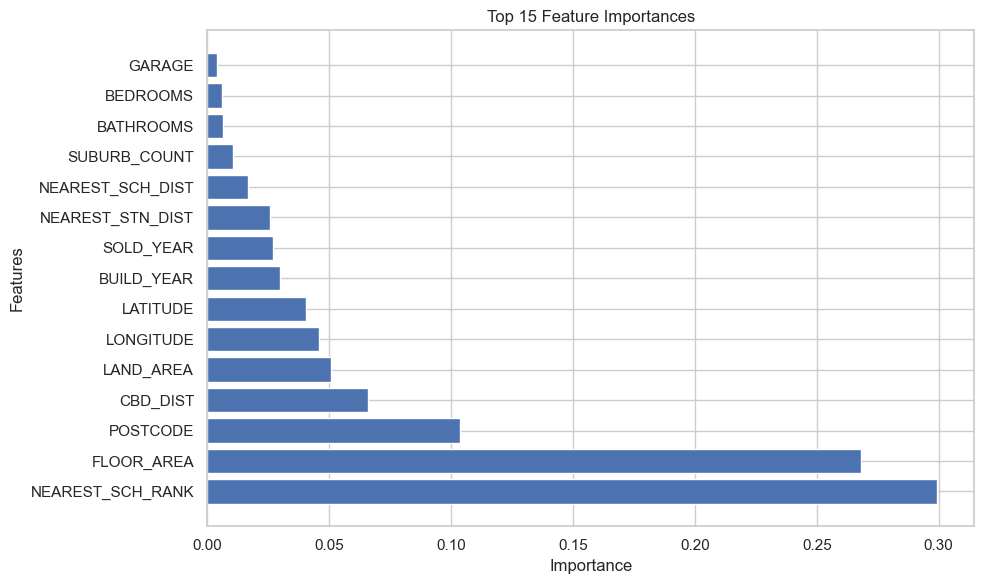

In [23]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top k important features
k = 15 
selected_features = [feature for feature, importance in sorted_feature_importance[:k]]

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), [importance for _, importance in sorted_feature_importance[:k]], tick_label=selected_features)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top {} Feature Importances".format(k))
plt.tight_layout()
plt.show()


# Splitting data

In [34]:
from sklearn.model_selection import train_test_split

X = df[['BEDROOMS', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 
             'SOLD_YEAR', 'POSTCODE', 'GARAGE', 'NEAREST_SCH_RANK', 
             'CBD_DIST',]]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

## Random Forest

In [35]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Define the parameters
params = {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 400}

# Create a Random Forest Regressor with the specified parameters
model = RandomForestRegressor(max_depth=params['max_depth'], 
                              min_samples_split=params['min_samples_split'], 
                              n_estimators=params['n_estimators'],
                              random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 0.84


In [30]:
print(y_pred)

[ 496831.58422619 1063760.42827381  582471.75       ...  502624.37651984
 1179596.97321429  382162.71251984]


# Model Evaluation

### learning curve

### random forest parameter grid

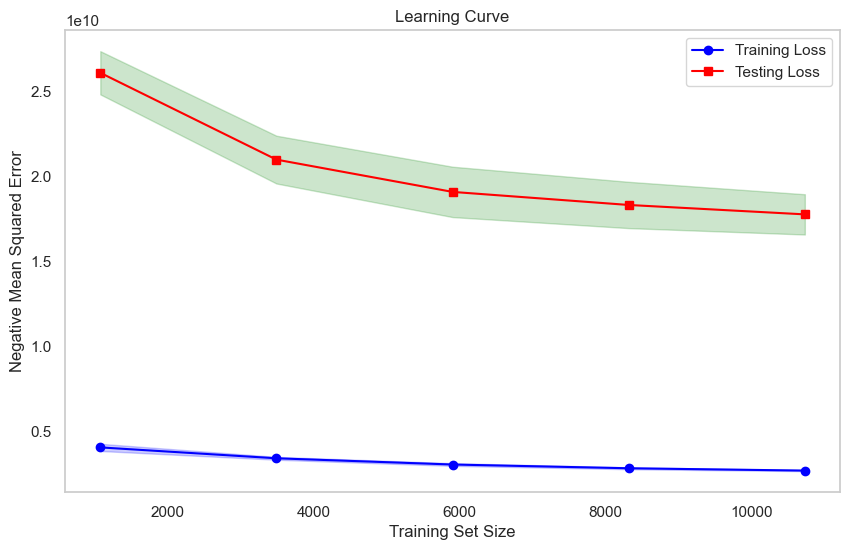

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve with the model
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Loss', color='red', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()


# dumping the model

In [ ]:
import pickle
with open('./model7.sav', 'wb') as file:
    pickle.dump(model, file)